<a href="https://colab.research.google.com/github/vanshuwjoshi/End-To-End-ML/blob/main/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import the MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',
                     as_frame=False ## this does not return images but the arrays
                     )
## mnist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys() ## data is stored in a kind of key-value system

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Here data is X and target is y

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

Trying to view a digit

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
X[0].shape

(784,)

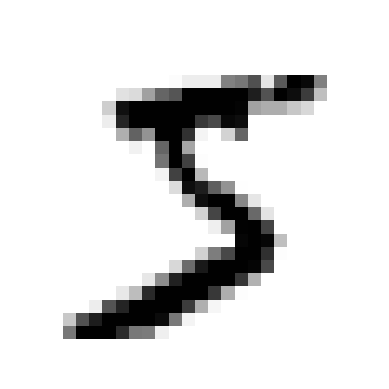

In [10]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image = image_data.reshape(28,28) ## reshape the image to 28x28 matrix
  plt.imshow(image,cmap='binary') ## binary means 0 is white and 255 is black
  plt.axis("off") ## remove the axis labels

plot_digit(X[0])
plt.show()

Looks like a 5. We can check the "target" or y  in our case.

In [11]:
y[0]

'5'

Split the data into training and test set. However, in this set, first 60000 are training and next 10000 are test.

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [13]:
## 5 or not-5
y_train_5 = (y_train == '5') ## Return array of True (if 5) or False (if non-5)
y_test_5 = (y_test == '5')

In [14]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
## Testing on X[0]
sgd_clf.predict([X[0]])

array([ True])

## Performance Measure

### 1. Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score

## 3-fold Cross Validation
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

This is a High Accuracy - 95%.

However, this need not be the best model as there might be overfitting or some other kind of issue.

In [19]:
## Creating a dummy classifier - Classify all images to the most frequent class
## (non-5 in this case)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [20]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Even with a Dummy Classifier we get a 90% accuracy. This is because majority of the images are non-5, therefore, there is a high chance of getting a non-5 image predicted correctly.

Conclusion - Accuracy is not a good measure for Classifiers, especially for dealing with skewed datasets (when one class is much more frequent than the others).

#### Implementing Cross-Validation without sklearn

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) ## 3 folds stratified samples

for train_index, test_index in skfolds.split(X_train, y_train_5):
  '''
  Since the data is split into 3 folds, .split function take 2 folds at a
  time and use it as training data and the remaining fold is used as test data.
  train_index and test_index are two arrays with indexes representing training
  and test data.
  '''
  ## Cloing the classifier
  clone_clf = clone(sgd_clf)

  ## Training data
  X_train_fold = X_train[train_index]
  y_train_fold = y_train_5[train_index]

  ## Testing data
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  ## Training the model & making predictions
  clone_clf.fit(X_train_fold, y_train_fold)
  y_pred = clone_clf.predict(X_test_fold)

  ## Calculate and print accuracy
  n_correct = sum(y_test_fold == y_pred)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


### Confusion Matrix

In [22]:
## Making predictions using CV
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
## Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

- TN = 53892
- FP = 687
- FN = 1891
- TP = 3530

### Precision and Recall

In [24]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score = ", precision_score(y_train_5, y_train_pred))
print("Recall Score = ", recall_score(y_train_5, y_train_pred))

Precision Score =  0.8370879772350012
Recall Score =  0.6511713705958311


When compared to accuracy, we can see that these scores are very low. Especially the Recall, as out of all the 5's only 65% are correctly predicted.

In [25]:
## F1 Score = Harmonic mean of Precision and Recall
from sklearn.metrics import f1_score
print("F1 Score = ", f1_score(y_train_5, y_train_pred))

F1 Score =  0.7325171197343846


#### Precision and Recall Tradeoff

In [26]:
## Calculate score of each instance
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function") ## return decision scores
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [27]:
## Get Precision and Recall of all possible Thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [33]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [32]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

precision_recall_curve() adds a last precision of 1 and a last recall of 0. Therefore, we need to remove these to plot our values.

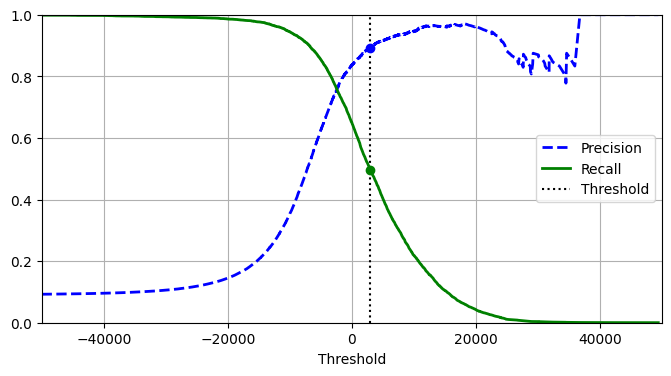

In [43]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
## Showing a threshold of 3000
plt.vlines(3000, 0, 1.0, "k", "dotted", label="Threshold")

## Get first index for which threshold >= 3000
idx = (thresholds >= 3000).argmax()
## Plotting the precision and recall for that index
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

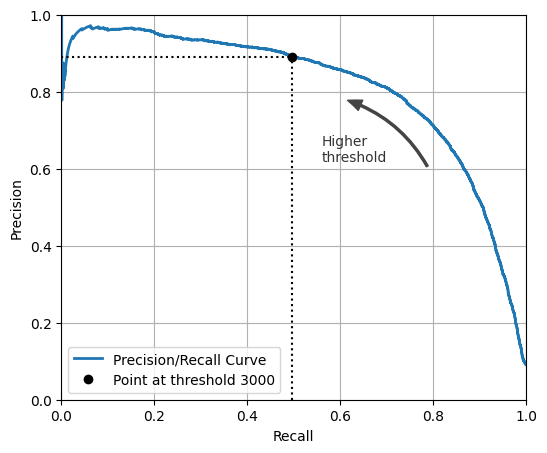

In [50]:
## Plotting Precision vs Recall
import matplotlib.patches as patches

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")

## Plotting points for threshold >= 3000
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.,recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold 3000")

## Add the arrow
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [51]:
## Searching for lowest threshold to get 90% Precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [52]:
## Making predictions based on the above threshold
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [53]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [54]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

We achieve 90% Precision but at 47% Recall.